# Calculating CpG ratio for the *Acropora palmata* transcriptome

This workflow calculates CpG ratio, or CpG O/E, for contigs in the *Acropora palmata* [transcriptome](https://usegalaxy.org/datasets/cb51c4a06d7ae94e/display?to_ext=fasta). CpG ratio is an estimate of germline DNA methylation.

This workflow is an extension of another IPython notebook workflow, `Apalm_blast_anno.ipynb`, that generates an annotation of the same transcriptome. This workflow assumes that you have created the directories and files specified in the annotation workflow.

In [1]:
cd .data/Apalm

/Users/jd/Documents/Projects/Coral-CpG-ratio-MS/data/Apalm


In [2]:
#fasta file generated in Apalm_blast_anno.ipynb
!head -2 Apalmata_assembled.fasta
!echo 
!echo number of seqs =
!fgrep -c ">" Apalmata_assembled.fasta

>AOKF1013_g2_c length=710 Acc=Q9DE13 Description=Bromodomainadjacenttozincfingerdomainprotein2B
AGGGCAATTGAGTCGCAAAGAAAACAAGAGGAGCGTGAAAGATTAAAGGAAGAGAAAAAAATGGAAAAGGAACTTCAAAGAGAGAAAAAGCTTGAGCAAAAGAGAAGGGAGATGATTTTAGCCCGTGAACTGAAAAAGCCAGTAGAAGATATGGTTTTAAAGGATAGCAAGACACTTCCTGCTTTCTCCAGAGTTGTGGGCCTTAAAATACCAGGGGACGCATTTGCTGACTTGTTGATGGTTCAGGAATTTGTGCACAATTTTAGTGAAGCCTTGGAACTTGATTCCAACGAAGTCCCTTCCTTGTGGGAAATGCAGTTGTCATTGTTAAATGACAGCAGTGAGGATGTCCTCGTGCCACTTTGTCAGAGTCTTCTGATGTCTGCATTAGAGGATCCTGGCTGTGAGGGGCCTGATTCATTCACAATGCTTGGAGTTGCATTAGCCAAAGTGGAATTGAATGAAACAAACTTCTCTGAAGTCTTGAGGCTGTTTATAATTTCAAGAAATGCTGGTGACCCTCATCCTTTGGCAGAAGCTTTCATCAGTACACCTTTCCAAGCACTCACCATGTCAGCTAAGGCTGGAGTCTTGGGTTACCTGTGCAATGAACTGCTGTGCAGTAGAACAATATGCAAGGAAATAGAGAATAGTATTGAACACATGTCAAATTTACGTCGAGATAAGTGGGTTGTGGAAGGCAAGTTTGG

number of seqs =
88020


In [3]:
#I remembered that this fasta is full of " marks before some of the ">"
#Removing " from fasta and printing first line w/out comments and looking at contig names
!sed 's/"//g' Apalmata_assembled.fasta | awk '{print $1}' > Apalm.fasta
!head -10 Apalm.fasta
!tail -10 Apalm.fasta

>AOKF1013_g2_c
AGGGCAATTGAGTCGCAAAGAAAACAAGAGGAGCGTGAAAGATTAAAGGAAGAGAAAAAAATGGAAAAGGAACTTCAAAGAGAGAAAAAGCTTGAGCAAAAGAGAAGGGAGATGATTTTAGCCCGTGAACTGAAAAAGCCAGTAGAAGATATGGTTTTAAAGGATAGCAAGACACTTCCTGCTTTCTCCAGAGTTGTGGGCCTTAAAATACCAGGGGACGCATTTGCTGACTTGTTGATGGTTCAGGAATTTGTGCACAATTTTAGTGAAGCCTTGGAACTTGATTCCAACGAAGTCCCTTCCTTGTGGGAAATGCAGTTGTCATTGTTAAATGACAGCAGTGAGGATGTCCTCGTGCCACTTTGTCAGAGTCTTCTGATGTCTGCATTAGAGGATCCTGGCTGTGAGGGGCCTGATTCATTCACAATGCTTGGAGTTGCATTAGCCAAAGTGGAATTGAATGAAACAAACTTCTCTGAAGTCTTGAGGCTGTTTATAATTTCAAGAAATGCTGGTGACCCTCATCCTTTGGCAGAAGCTTTCATCAGTACACCTTTCCAAGCACTCACCATGTCAGCTAAGGCTGGAGTCTTGGGTTACCTGTGCAATGAACTGCTGTGCAGTAGAACAATATGCAAGGAAATAGAGAATAGTATTGAACACATGTCAAATTTACGTCGAGATAAGTGGGTTGTGGAAGGCAAGTTTGG
>AOKF1022_b2_c
GGGCAAAACGAACAAATTTTGACAATAATCTCTCAAATCTGTCAAGTCACGGCAGGGCTGCAAATAGCTATCGGGGAGGCGCCGGTCACGTCCGGTCAAACATGATTTTGCTCGGACAAGACCCGCTTTTGGCCGGTCAAATTTTAACAGTCGTAACTCTTACGATAGTGAACCCAGATTGCGCAGTAATCCTTTTATAACTACAAAACAATTGAATCCAAGTCGGTTTGGCAATAAAAGGTACTACTTTTACCACTCT

In [4]:
#Converting FASTA to tabular format and placing output file in analyses directory
!perl -e '$count=0; $len=0; while(<>) {s/\r?\n//; s/\t/ /g; if (s/^>//) { if ($. != 1) {print "\n"} s/ |$/\t/; $count++; $_ .= "\t";} else {s/ //g; $len += length($_)} print $_;} print "\n"; warn "\nConverted $count FASTA records in $. lines to tabular format\nTotal sequence length: $len\n\n";' \
Apalm.fasta > ../../analyses/Apalm/fasta2tab


Converted 88020 FASTA records in 176040 lines to tabular format
Total sequence length: 63829400



In [1]:
cd ../../analyses/Apalm

/Users/jd/Documents/Projects/Coral-CpG-ratio-MS/analyses/Apalm


In [6]:
#Checking header on new tabular format file
!head -2 fasta2tab
!tail -2 fasta2tab

AOKF1013_g2_c		AGGGCAATTGAGTCGCAAAGAAAACAAGAGGAGCGTGAAAGATTAAAGGAAGAGAAAAAAATGGAAAAGGAACTTCAAAGAGAGAAAAAGCTTGAGCAAAAGAGAAGGGAGATGATTTTAGCCCGTGAACTGAAAAAGCCAGTAGAAGATATGGTTTTAAAGGATAGCAAGACACTTCCTGCTTTCTCCAGAGTTGTGGGCCTTAAAATACCAGGGGACGCATTTGCTGACTTGTTGATGGTTCAGGAATTTGTGCACAATTTTAGTGAAGCCTTGGAACTTGATTCCAACGAAGTCCCTTCCTTGTGGGAAATGCAGTTGTCATTGTTAAATGACAGCAGTGAGGATGTCCTCGTGCCACTTTGTCAGAGTCTTCTGATGTCTGCATTAGAGGATCCTGGCTGTGAGGGGCCTGATTCATTCACAATGCTTGGAGTTGCATTAGCCAAAGTGGAATTGAATGAAACAAACTTCTCTGAAGTCTTGAGGCTGTTTATAATTTCAAGAAATGCTGGTGACCCTCATCCTTTGGCAGAAGCTTTCATCAGTACACCTTTCCAAGCACTCACCATGTCAGCTAAGGCTGGAGTCTTGGGTTACCTGTGCAATGAACTGCTGTGCAGTAGAACAATATGCAAGGAAATAGAGAATAGTATTGAACACATGTCAAATTTACGTCGAGATAAGTGGGTTGTGGAAGGCAAGTTTGG
AOKF1022_b2_c		GGGCAAAACGAACAAATTTTGACAATAATCTCTCAAATCTGTCAAGTCACGGCAGGGCTGCAAATAGCTATCGGGGAGGCGCCGGTCACGTCCGGTCAAACATGATTTTGCTCGGACAAGACCCGCTTTTGGCCGGTCAAATTTTAACAGTCGTAACTCTTACGATAGTGAACCCAGATTGCGCAGTAATCCTTTTATAACTACAAAACAATTGAATCCAAGTCGGTTTGGCAATAAAAGGTACTACTTTTACCACTCT

In [7]:
#Add column with length of sequence
!perl -e '$col = 2;' -e 'while (<>) { s/\r?\n//; @F = split /\t/, $_; $len = length($F[$col]); print "$_\t$len\n" } warn "\nAdded column with length of column $col for $. lines.\n\n";' \
fasta2tab > tab_1



Added column with length of column 2 for 88020 lines.



In [8]:
!wc tab_1

   88020  264060 65591859 tab_1


In [9]:
#The file used to count Cs and Gs will only include the sequence
!awk '{print $2}' tab_1 > tab_2

In [10]:
#This counts CGs - both cases
!echo "CG" | awk -F\[Cc][Gg] '{print NF-1}' tab_2 > CG 

In [11]:
#Counts Cs
!echo "C" | awk -F\[Cc] '{print NF-1}' tab_2 > C 

In [12]:
#Counts Gs
!echo "G" | awk -F\[Gg] '{print NF-1}' tab_2 > G 

In [13]:
#Combining counts
!paste tab_1 \
CG \
C \
G \
> comb
!head -1 comb

AOKF1013_g2_c		AGGGCAATTGAGTCGCAAAGAAAACAAGAGGAGCGTGAAAGATTAAAGGAAGAGAAAAAAATGGAAAAGGAACTTCAAAGAGAGAAAAAGCTTGAGCAAAAGAGAAGGGAGATGATTTTAGCCCGTGAACTGAAAAAGCCAGTAGAAGATATGGTTTTAAAGGATAGCAAGACACTTCCTGCTTTCTCCAGAGTTGTGGGCCTTAAAATACCAGGGGACGCATTTGCTGACTTGTTGATGGTTCAGGAATTTGTGCACAATTTTAGTGAAGCCTTGGAACTTGATTCCAACGAAGTCCCTTCCTTGTGGGAAATGCAGTTGTCATTGTTAAATGACAGCAGTGAGGATGTCCTCGTGCCACTTTGTCAGAGTCTTCTGATGTCTGCATTAGAGGATCCTGGCTGTGAGGGGCCTGATTCATTCACAATGCTTGGAGTTGCATTAGCCAAAGTGGAATTGAATGAAACAAACTTCTCTGAAGTCTTGAGGCTGTTTATAATTTCAAGAAATGCTGGTGACCCTCATCCTTTGGCAGAAGCTTTCATCAGTACACCTTTCCAAGCACTCACCATGTCAGCTAAGGCTGGAGTCTTGGGTTACCTGTGCAATGAACTGCTGTGCAGTAGAACAATATGCAAGGAAATAGAGAATAGTATTGAACACATGTCAAATTTACGTCGAGATAAGTGGGTTGTGGAAGGCAAGTTTGG	710	8	119	183


# Calculating CpGo/e based on [Gavery and Roberts (2010)](http://www.biomedcentral.com/1471-2164/11/483)

<img src="http://eagle.fish.washington.edu/cnidarian/skitch/BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png" alt="BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png"/>

In [14]:
#Calculation of CpG o/e
!awk '{print $1, "\t", (($4)/($5*$6))*(($3^2)/($3-1))}' comb > ID_CpG  #use ^ instead of ** for exponent

In [15]:
!head ID_CpG

AOKF1013_g2_c 	 0.261194
AOKF1022_b2_c 	 1.21084
AOKF1022_g2_c 	 0.933676
AOKF1024_g2_c 	 0.46793
AOKF1029_g2_c 	 0.305319
AOKF1031_g2_c 	 0.476647
AOKF1034_g2_c 	 0.250371
AOKF1040_g2_c 	 1.11148
AOKF1045_g2_c 	 0.415524
AOKF1046_g2_c 	 0.278746


# Now joining CpG to annotation, but first must sort files.

In [2]:
#Sorting Apalm Uniprot/Swissprot annotation file. This file was the result of work done in another notebook: 
#Apalm_blast_anno.ipynb
!sort Apalm_blastx_uniprot_sql.tab | tail -n +2 > Apalm_blastx_uniprot_sql.tab.sorted
!head Apalm_blastx_uniprot_sql.tab.sorted

AOKF1031_g2_c	sp	Q66I12	CCD47_DANRE	46.03	239	126	3	8	721	229	465	3e-48	  171
AOKF1045_g2_c	sp	B5DFQ4	RHG26_XENTR	45.99	237	126	1	2	712	74	308	1e-60	  208
AOKF1050_b2_c	sp	P81004	VDAC2_XENLA	67.41	135	44	0	315	719	3	137	5e-60	  197
AOKF1057_b2_c	sp	P56616	UBE2C_XENLA	55.48	146	60	4	109	537	34	177	3e-49	  166
AOKF1062_g2_c	sp	Q5PR73	DIRA2_MOUSE	37.35	166	99	4	4	501	7	167	2e-29	  113
AOKF1091_g2_c	sp	A2RRV3	PATL1_DANRE	38.69	168	83	4	195	695	402	550	4e-26	  111
AOKF1100_g2_c	sp	L0N7N1	KIF14_MOUSE	54.02	87	40	0	397	657	424	510	1e-26	  112
AOKF1114_g2_c	sp	Q9BX66	SRBS1_HUMAN	47.17	53	28	0	188	346	798	850	2e-10	63.9
AOKF1132_g2_c	sp	Q8VDS4	RPR1A_MOUSE	53.04	247	111	2	2	727	20	266	8e-84	  259
AOKF1164_g2_c	sp	Q9VHH9	JHD1_DROME	67.72	127	41	0	2	382	250	376	1e-59	  209


In [16]:
#Sorting Ahya GOSlim annotation file. This file was the result of work done in another notebook: Apalm_blast_anno.ipynb
!sort Apalm_GOSlim.tab | tail -n +2 > Apalm_GOSlim.sorted
!head Apalm_GOSlim.sorted

In [17]:
#Sorting Ahya CpG file
!sort ID_CpG > ID_CpG.sorted
!head ID_CpG.sorted

AOKF1013_g2_c 	 0.261194
AOKF1022_b2_c 	 1.21084
AOKF1022_g2_c 	 0.933676
AOKF1024_g2_c 	 0.46793
AOKF1029_g2_c 	 0.305319
AOKF1031_g2_c 	 0.476647
AOKF1034_g2_c 	 0.250371
AOKF1040_g2_c 	 1.11148
AOKF1045_g2_c 	 0.415524
AOKF1046_g2_c 	 0.278746


In [3]:
!join ID_CpG.sorted Apalm_blastx_uniprot_sql.tab.sorted | awk '{print $1, "\t", $2}' > Apalm_cpg_anno

In [4]:
!head Apalm_cpg_anno

AOKF1031_g2_c 	 0.476647
AOKF1045_g2_c 	 0.415524
AOKF1050_b2_c 	 0.405247
AOKF1057_b2_c 	 0.337031
AOKF1062_g2_c 	 1.00104
AOKF1091_g2_c 	 0.503552
AOKF1100_g2_c 	 0.616876
AOKF1114_g2_c 	 0.964931
AOKF1132_g2_c 	 0.228244
AOKF1164_g2_c 	 0.905474


In [18]:
!join ID_CpG.sorted Apalm_GOSlim.sorted > Apalm_cpg_GOslim

In [19]:
!head Apalm_cpg_GOslim

In [20]:
#Putting tabs in between columns
!awk '{print $1, "\t", $2, "\t", $3, $4, $5, $6}' Apalm_cpg_GOslim > Apalm_cpg_GOslim.tab
!head Apalm_cpg_GOslim.tab

# Now time to plot data using pandas and matplot

In [2]:
import pandas as pd

In [3]:
jData = pd.read_table('Apalm_cpg_GOslim.tab', header=None)
jData

,0,1,2
0,AOKF1045_g2_c,0.415524,cell organization and biogenesis
1,AOKF1045_g2_c,0.415524,other biological processes
2,,NaN,NaN
3,AOKF1045_g2_c,0.415524,signal transduction
4,,NaN,NaN
5,AOKF1050_b2_c,0.405247,transport
6,,NaN,NaN
7,AOKF1057_b2_c,0.337031,cell cycle and proliferation
8,AOKF1057_b2_c,0.337031,cell organization and biogenesis
9,AOKF1057_b2_c,0.337031,other biological processes


In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt 

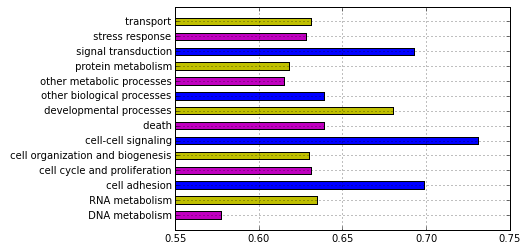

In [6]:
jData.groupby(2)[1].mean().plot(kind='barh', color=list('myb'))
plt.axis([0.55, 0.75, -1, 14])
plt.xlabel('')
plt.ylabel('')
plt.show()

In [7]:
#To plot density curve, must use CpG data WITHOUT annotation
CpG = pd.read_table('Apalm_cpg_anno', header=None)
CpG

,0,1
0,AOKF1031_g2_c,0.476647
1,AOKF1045_g2_c,0.415524
2,AOKF1050_b2_c,0.405247
3,AOKF1057_b2_c,0.337031
4,AOKF1062_g2_c,1.001040
5,AOKF1091_g2_c,0.503552
6,AOKF1100_g2_c,0.616876
7,AOKF1114_g2_c,0.964931
8,AOKF1132_g2_c,0.228244
9,AOKF1164_g2_c,0.905474


[-0.3, 1.7, 0, 1.7]

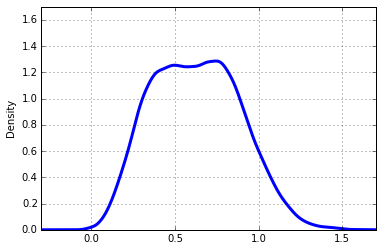

In [8]:
# pandas density plot
CpG[1].plot(kind='kde', linewidth=3);
plt.axis([-0.3, 1.7, 0, 1.7])

## Now looking only at differentially expressed contigs, joining via common contig IDs

day1and2.txt is a file listing contigs that were differentially expressed in response to *either* one or two days of thermal stress. The samples were also *A. palmata* larvae. The file was derived from an [Excel file containing supplementary data](http://datadryad.org/bitstream/handle/10255/dryad.39350/SuppTableS3_Final.xlsx?sequence=1) that was presented in [Polato et al. (2013)](http://onlinelibrary.wiley.com.offcampus.lib.washington.edu/doi/10.1111/mec.12163/abstract). Contig IDs are the same as in the transcriptome and can be joined using common contig IDs.

In [9]:
!head day1and2.txt
!wc day1and2.txt

AOKF1013_g2_c
AOKF1050_b2_c
AOKF1050_b2_c
AOKF1140_b2_c
AOKF1501_b2_c
AOKF1952_b2_c
AOKF386_g2_c
AOKG1730_b2_c
AOKG1840_b2_c
CAFB1171_b2_c
    2581    2582   34046 day1and2.txt


In [10]:
!uniq day1and2.txt > day1and2_uniq.txt
!head day1and2_uniq.txt
!wc day1and2_uniq.txt

AOKF1013_g2_c
AOKF1050_b2_c
AOKF1140_b2_c
AOKF1501_b2_c
AOKF1952_b2_c
AOKF386_g2_c
AOKG1730_b2_c
AOKG1840_b2_c
CAFB1171_b2_c
CAFB1297_b2_c
    2002    2002   26622 day1and2_uniq.txt


## Now joining with CpG file

In [11]:
!sort day1and2_uniq.txt > day1and2_uniq.txt.sorted
!head day1and2_uniq.txt.sorted

AOKF1013_g2_c
AOKF1050_b2_c
AOKF1140_b2_c
AOKF1501_b2_c
AOKF1952_b2_c
AOKF386_g2_c
AOKG1730_b2_c
AOKG1840_b2_c
CAFB1171_b2_c
CAFB1297_b2_c


In [12]:
!join day1and2_uniq.txt.sorted ID_CpG.sorted | awk '{print $1, "\t", $2}' > day1and2temp_CpG
!head day1and2temp_CpG
!wc day1and2temp_CpG

AOKF1013_g2_c 	 0.261194
AOKF1050_b2_c 	 0.405247
AOKF1140_b2_c 	 0.828815
AOKF1501_b2_c 	 0.730739
AOKF1952_b2_c 	 1.26506
AOKF386_g2_c 	 1.02326
AOKG1730_b2_c 	 0.852003
AOKG1840_b2_c 	 0.623692
CAFB1171_b2_c 	 0.638914
CAFB1297_b2_c 	 0
    2002    4004   48074 day1and2temp_CpG


In [13]:
#Joining with annotation file
!join day1and2temp_CpG Apalm_blastx_uniprot_sql.tab.sorted | awk '{print $1, "\t", $2}' > Apalm_diff_cpg_anno
!head Apalm_diff_cpg_anno
!wc Apalm_diff_cpg_anno

AOKF1050_b2_c 	 0.405247
AOKF386_g2_c 	 1.02326
AOKG1730_b2_c 	 0.852003
AOKG1840_b2_c 	 0.623692
CAOG977_b1_c 	 0.424244
CAOH2044_b1_c 	 0.720682
CAOH2436_g1_c 	 0.546901
CAOH2554_b1_c 	 0.589779
CAOI2629_b1_c 	 1.07011
CAOI641_b2_c 	 0.898445
     994    1988   23814 Apalm_diff_cpg_anno


In [28]:
#Joining with GOslim annotation file
!join day1and2temp_CpG Apalm_GOSlim.sorted | awk '{print $1, "\t", $2, "\t", $3, $4, $5, $6}' > Apalm_diff_cpg_GOslim
!head Apalm_diff_cpg_GOslim
!wc Apalm_diff_cpg_GOslim

   
AOKF386_g2_c 	 1.02326 	 cell organization and biogenesis
  
AOKG1730_b2_c 	 0.852003 	 cell organization and biogenesis
  
 
  
CAOI2629_b1_c 	 1.07011 	 cell organization and biogenesis
  
 
    1909    8565   96254 Apalm_diff_cpg_GOslim


## Now plotting data using pandas and matplot

In [19]:
Apalm_diff_CpG_GOSlim = pd.read_table('Apalm__diff_cpg_GOslim', header=None)
Apalm_diff_CpG_GOSlim

,0,1,2
0,AOKF1050_b2_c,0.405247,transport
1,,NaN,NaN
2,AOKF386_g2_c,1.023260,cell organization and biogenesis
3,AOKG1730_b2_c,0.852003,RNA metabolism
4,,NaN,NaN
5,AOKG1730_b2_c,0.852003,cell organization and biogenesis
6,CAOG977_b1_c,0.424244,protein metabolism
7,,NaN,NaN
8,CAOH2436_g1_c,0.546901,other biological processes
9,,NaN,NaN


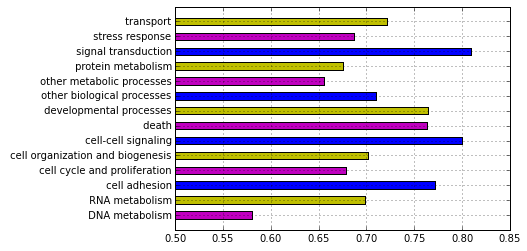

In [20]:
Apalm_diff_CpG_GOSlim.groupby(2)[1].mean().plot(kind='barh', color=list('myb'))
plt.axis([0.5, 0.85, -1, 14])
plt.xlabel('')
plt.ylabel('')
plt.show()

In [23]:
Apalm_diff_CpG_Data = pd.read_table('Apalm_diff_cpg_anno', header=None)
Apalm_diff_CpG_Data 

,0,1
0,AOKF1050_b2_c,0.405247
1,AOKF386_g2_c,1.023260
2,AOKG1730_b2_c,0.852003
3,AOKG1840_b2_c,0.623692
4,CAOG977_b1_c,0.424244
5,CAOH2044_b1_c,0.720682
6,CAOH2436_g1_c,0.546901
7,CAOH2554_b1_c,0.589779
8,CAOI2629_b1_c,1.070110
9,CAOI641_b2_c,0.898445


[-0.3, 1.7, 0, 2.0]

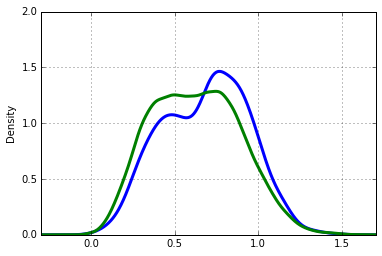

In [24]:
# pandas density plot
Apalm_diff_CpG_Data[1].plot(kind='kde', linewidth=3);
CpG[1].plot(kind='kde', linewidth=3);
plt.axis([-0.3, 1.7, 0, 2.0])

In [25]:
import numpy as np

In [26]:
np.mean(CpG)

1    0.626061
dtype: float64

In [27]:
np.mean(Apalm_diff_CpG_Data)

1    0.683799
dtype: float64